In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set()
from scipy.stats import norm
import ast
import math
import pickle

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind


In [2]:
# files = glob.glob('/Users/mac/Box/Campus-study-2019/campus-processed/search+youtube/separated/begin-college/*.csv')
positive_pickle = open('/Users/mac/Box/Campus-study-2019/campus-processed/campus_population_breakdown/psi_subjects.pkl', 'rb')
negative_pickle = open('/Users/mac/Box/Campus-study-2019/campus-processed/campus_population_breakdown/npsi_subjects.pkl', 'rb')

# a dictionary where the key is the survey id 
# and the value is the path to the online data (search+youtube) since begin college
positive_user = pickle.load(positive_pickle)
negative_user = pickle.load(negative_pickle)

print(len(positive_user), len(negative_user))

25 75


In [3]:
for key, val in negative_user.items():
    print(key, val)

1 Box/Campus-study-2019/campus-processed/search+youtube//37c2a1b9d1ed80_1-c-1.csv
2 Box/Campus-study-2019/campus-processed/search+youtube//37c2a4035b8826_2-c-1.csv
4 Box/Campus-study-2019/campus-processed/search+youtube//37c37d7e844444_4-c-1.csv
8 Box/Campus-study-2019/campus-processed/search+youtube//37c3877d180f48_8-c-1.csv
10 Box/Campus-study-2019/campus-processed/search+youtube//37c5c93e44a446_10-c-1.csv
11 Box/Campus-study-2019/campus-processed/search+youtube//37c5d8115e3d8a_11-c-1.csv
12 Box/Campus-study-2019/campus-processed/search+youtube//37c5dd31a5b31c_12-c-1.csv
14 Box/Campus-study-2019/campus-processed/search+youtube//37c5e80767ce9a_14-c-1.csv
15 Box/Campus-study-2019/campus-processed/search+youtube//37c5eb74a978e6_15-c-1.csv
17 Box/Campus-study-2019/campus-processed/search+youtube//37c5fd635f81a8_17-c-1.csv
19 Box/Campus-study-2019/campus-processed/search+youtube//37c6a1c695ce00_19-c-1.csv
20 Box/Campus-study-2019/campus-processed/search+youtube//37c6a515f7e7aa_20-c-1.csv


In [4]:
  
positive_user.update({'93' : 'Box/Campus-study-2019/campus-processed/search+youtube//600000000000000_60-c-1.csv'})
for key, val in positive_user.items():
    print(key, val)

3 Box/Campus-study-2019/campus-processed/search+youtube//37c3791c7201c4_3-c-1.csv
5 Box/Campus-study-2019/campus-processed/search+youtube//37c37e09147e50_5-c-1.csv
6 Box/Campus-study-2019/campus-processed/search+youtube//37c3823ed08d04_6-c-1.csv
13 Box/Campus-study-2019/campus-processed/search+youtube//37c5e3120050c2_13-c-1.csv
16 Box/Campus-study-2019/campus-processed/search+youtube//37c5f26c3b2004_16-c-1.csv
18 Box/Campus-study-2019/campus-processed/search+youtube//37c69d1779ae0a_18-c-1.csv
28 Box/Campus-study-2019/campus-processed/search+youtube//37c6c46bf8e14c_28-c-1.csv
33 Box/Campus-study-2019/campus-processed/search+youtube//37c785a98d16de_33-c-1.csv
35 Box/Campus-study-2019/campus-processed/search+youtube//37c82ad4a38ba4_35-c-1.csv
38 Box/Campus-study-2019/campus-processed/search+youtube//37c84577b95fce_38-c-1.csv
57 Box/Campus-study-2019/campus-processed/search+youtube//37cdc13471ce7e_57-c-1.csv
60 Box/Campus-study-2019/campus-processed/search+youtube//600000000000000_60-c-1.c

In [5]:

# trim and clean the category for GS 
def trim_gs_category(gs):
    gs_list = ast.literal_eval(gs)
    if len(gs_list) > 0:
        return gs_list[0][0].split('/')[1]
    else:
        return 'unknown'

# trim and clean the category for YT
def trim_yt_category(yt):
    yt_list = ast.literal_eval(yt)
    if len(yt_list) > 0:
        return yt_list[0]
    else:
        return 'unknown'

In [6]:
yt_categories = {'Comedy', 'Nonprofits & Activism', 'Howto & Style', 'Science & Technology', 'Pets & Animals', 'Travel & Events', 'Education', 'Film & Animation', 'Shows', 'Sports', 'Gaming', 'News & Politics', 'People & Blogs', 'Music', 'Entertainment', 'Autos & Vehicles'}
gs_categories = {'Games', 'Online Communities', 'Pets & Animals', 'Adult', 'Business & Industrial', 'Arts & Entertainment', 'Law & Government', 'Sensitive Subjects', 'Internet & Telecom', 'News', 'Real Estate', 'Travel', 'Computers & Electronics', 'Jobs & Education', 'Sports', 'Hobbies & Leisure', 'Reference', 'Beauty & Fitness', 'Science', 'Health', 'Books & Literature', 'People & Society', 'Food & Drink', 'Search', 'Shopping', 'Finance', 'Home & Garden', 'Autos & Vehicles'}

In [7]:
yt_category_to_gs = {
    'Autos & Vehicles':'Autos & Vehicles',
    'Comedy':'Arts & Entertainment',
    'Education':'Jobs & Education',
    'Entertainment':'Arts & Entertainment',
    'Film & Animation':'Arts & Entertainment',
    'Gaming':'Games',
    'Howto & Style':'Reference',
    'Music':'Arts & Entertainment',
    'News & Politics':'News',
    'Nonprofits & Activism':'People & Society',
    'People & Blogs':'People & Society',
    'Pets & Animals':'Pets & Animals',
    'Science & Technology':'Science',
    'Shows':'Arts & Entertainment',
    'Sports':'Sports',
    'Travel & Events': 'Travel'
}

all_categories = list(gs_categories)
print(all_categories.index('Search'), len(all_categories))

9 28


In [8]:
# shift and rescale the data
def shift_and_rescale(all_activities):
    
    # all_activities: week_num * (28 + 4)
    mean = np.mean(all_activities, axis = 0) # week_num
    std = np.std(all_activities, axis = 0) # week_num
    
    # print('mean: ', mean, 'median: ', np.median(all_activities, axis = 0))
    all_activities = (all_activities - mean) / std
    return all_activities


In [9]:

positive_categorical_distribution = dict()

for survey_ID, path in positive_user.items():
    ID = path.split('/')[-1]
    path = '/Users/mac/Box/Campus-study-2019/campus-processed/search+youtube/' + ID
    f = open(path)
    print('processing', ID)
    
    # Monday is 0 in the weekdays col
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df = df.loc[df['source'] == 'search']
    
#     cutoff_date = datetime(2018, 1, 1)
#     df = df.loc[df.datetime > cutoff_date]
    
    category_vec = np.zeros(len(all_categories))        

    if len(df) > 0:

#         df.dropna(subset=['categories'], inplace = True)
        df['categories'].fillna('[]', inplace = True)
        df.reset_index(drop = True, inplace = True)

        for idx, row in df.iterrows():
            
            # get the category
            category_list = ast.literal_eval(row['categories'])
            if len(category_list) > 0:
                current_category = category_list[0][0].split('/')[1]
            else:
                current_category = 'Search'
            
            category_vec[all_categories.index(current_category)] += 1
        
        category_vec = np.delete(category_vec, [all_categories.index('Search')])
        category_vec = category_vec / np.sum(category_vec)
        print(category_vec.shape)
        positive_categorical_distribution.update({ID : category_vec})
    else:
        vec = np.ones(27) / 27
        positive_categorical_distribution.update({ID : vec})
    

processing 37c3791c7201c4_3-c-1.csv
(27,)
processing 37c37e09147e50_5-c-1.csv
(27,)
processing 37c3823ed08d04_6-c-1.csv
(27,)
processing 37c5e3120050c2_13-c-1.csv
(27,)
processing 37c5f26c3b2004_16-c-1.csv
(27,)
processing 37c69d1779ae0a_18-c-1.csv
(27,)
processing 37c6c46bf8e14c_28-c-1.csv


/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(27,)
processing 37c785a98d16de_33-c-1.csv
(27,)
processing 37c82ad4a38ba4_35-c-1.csv
(27,)
processing 37c84577b95fce_38-c-1.csv
processing 37cdc13471ce7e_57-c-1.csv
(27,)
processing 600000000000000_60-c-1.csv
(27,)
processing 37d1a2f5fca5da_61-c-1.csv
(27,)
processing 6222222222222_62-c-1.csv
(27,)
processing 655555555555555_65-c-1.csv
(27,)
processing 6777777777777_67-c-1.csv
(27,)
processing 77777777777_77-c-1.csv
(27,)
processing 87777777777_87-c-1.csv
(27,)
processing 89999999999_89-c-1.csv
(27,)
processing 91111111111_91-c-1.csv
(27,)
processing 600000000000000_60-c-1.csv
(27,)
processing 94444444444_94-c-1.csv
(27,)
processing 96666666666_96-c-1.csv
(27,)
processing 97777777777_97-c-1.csv
processing 104_104-c-1.csv


In [10]:
num = 7
n = 0
negative_categorical_distribution = dict()

for survey_ID, path in negative_user.items():
    ID = path.split('/')[-1]
    path = '/Users/mac/Box/Campus-study-2019/campus-processed/search+youtube/' + ID
    f = open(path)
    print('processing', ID)
    
    # Monday is 0 in the weekdays col
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df = df.loc[df['source'] == 'search']
    
#     cutoff_date = datetime(2018, 1, 1)
#     df = df.loc[df.datetime > cutoff_date]
    
    category_vec = np.zeros(len(all_categories))        

    if len(df) > 0:

#         df.dropna(subset=['categories'], inplace = True)
        df['categories'].fillna('[]', inplace = True)
        df.reset_index(drop = True, inplace = True)

        for idx, row in df.iterrows():
            
            # get the category
            category_list = ast.literal_eval(row['categories'])
            if len(category_list) > 0:
                current_category = category_list[0][0].split('/')[1]
            else:
                current_category = 'Search'
            
            category_vec[all_categories.index(current_category)] += 1
        
        category_vec = np.delete(category_vec, [all_categories.index('Search')])
        category_vec = category_vec / np.sum(category_vec)
        print(category_vec.shape)
        negative_categorical_distribution.update({ID : category_vec})
        n += 1
        
    if n >= num:
        break
        

processing 37c2a1b9d1ed80_1-c-1.csv
(27,)
processing 37c2a4035b8826_2-c-1.csv
(27,)
processing 37c37d7e844444_4-c-1.csv
(27,)
processing 37c3877d180f48_8-c-1.csv
(27,)
processing 37c5c93e44a446_10-c-1.csv
(27,)
processing 37c5d8115e3d8a_11-c-1.csv
(27,)
processing 37c5dd31a5b31c_12-c-1.csv
(27,)


In [ ]:
for key, val in positive_categorical_distribution.items():
    print(key, val)
    print('__________________________')
print(len(positive_categorical_distribution))

In [ ]:
for key, val in negative_categorical_distribution.items():
    print(key, val)
    print('__________________________')
    
print(len(negative_categorical_distribution))

# Lambda ISI

In [11]:
# get the lambda for the user
def get_lambda(df):
    
    diff = df['datetime'].diff()
    diff = [interval.seconds for interval in diff] # convert to seconds first
    # print(diff)
    diff = np.asarray(diff[1:])
    
    # return the mean of the fitted exp
    # diff = diff[diff != 0]
    
#     n_bins = 100
#     fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,10))

#     axs.hist(diff, bins = n_bins, alpha = 0.5, label = 'positive')
#     axs.legend(loc = 'best')

    return 1 / np.mean(diff)


In [12]:
def trim_category(string):
    
    category_list = ast.literal_eval(string)
    if len(category_list) > 0:
        current_category = category_list[0][0].split('/')[1]
    else:
        current_category = 'Search'
        
    return current_category

In [13]:
'''
all the positive examples
{ID : tuple(weekday_lambda, weekend_lambda, total_lambda)}
'''
positive_lambda_distribution = dict()

for survey_ID, path in positive_user.items():
    ID = path.split('/')[-1]
    path = '/Users/mac/Box/Campus-study-2019/campus-processed/search+youtube/' + ID
    f = open(path)
    print('processing', ID)
    
    # Monday is 0 in the weekdays col
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df = df.loc[df['source'] == 'search']
    
#     cutoff_date = datetime(2018, 1, 1)
#     df = df.loc[df.datetime > cutoff_date]
    
    lambda_vec = np.zeros(len(all_categories)) 
    
    if len(df) > 0:

        df.dropna(subset=['categories'], inplace = True)
#         df['categories'].fillna('[]', inplace = True)
        df.reset_index(drop = True, inplace = True)
        
        
#         for idx, row in df.iterrows():
#             # get the category
#             category_list = ast.literal_eval(row['categories'])
#             if len(category_list) > 0:
#                 current_category = category_list[0][0].split('/')[1]
#             else:
#                 current_category = 'Search'

        df['categories'] = df['categories'].map(trim_category)
        
#         print(df['categories'].unique())
        
        for c in all_categories:
            if c != 'Search':
                sub_df = df.loc[df['categories'] == c]
                if len(sub_df) >= 3:
                    c_lambda = get_lambda(sub_df) * 3600
                else:
                    c_lambda = 1/27
                    
                lambda_vec[all_categories.index(c)] = c_lambda
                
    else:
        lambda_vec = np.ones(27) / 27
    
    lambda_vec = np.delete(lambda_vec, [all_categories.index('Search')])
    positive_lambda_distribution.update({ID : lambda_vec}) 
    

processing 37c3791c7201c4_3-c-1.csv
processing 37c37e09147e50_5-c-1.csv
processing 37c3823ed08d04_6-c-1.csv
processing 37c5e3120050c2_13-c-1.csv
processing 37c5f26c3b2004_16-c-1.csv
processing 37c69d1779ae0a_18-c-1.csv
processing 37c6c46bf8e14c_28-c-1.csv
processing 37c785a98d16de_33-c-1.csv
processing 37c82ad4a38ba4_35-c-1.csv
processing 37c84577b95fce_38-c-1.csv
processing 37cdc13471ce7e_57-c-1.csv
processing 600000000000000_60-c-1.csv
processing 37d1a2f5fca5da_61-c-1.csv
processing 6222222222222_62-c-1.csv
processing 655555555555555_65-c-1.csv
processing 6777777777777_67-c-1.csv
processing 77777777777_77-c-1.csv
processing 87777777777_87-c-1.csv
processing 89999999999_89-c-1.csv
processing 91111111111_91-c-1.csv
processing 600000000000000_60-c-1.csv
processing 94444444444_94-c-1.csv
processing 96666666666_96-c-1.csv
processing 97777777777_97-c-1.csv
processing 104_104-c-1.csv


In [14]:
'''
all the positive examples
{ID : tuple(weekday_lambda, weekend_lambda, total_lambda)}
'''
num = 8
n = 0
negative_lambda_distribution = dict()

for survey_ID, path in negative_user.items():
    ID = path.split('/')[-1]
    path = '/Users/mac/Box/Campus-study-2019/campus-processed/search+youtube/' + ID
    f = open(path)
    print('processing', ID)
    
    # Monday is 0 in the weekdays col
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df = df.loc[df['source'] == 'search']
    
#     cutoff_date = datetime(2018, 1, 1)
#     df = df.loc[df.datetime > cutoff_date]
    
    lambda_vec = np.zeros(len(all_categories)) 
    
    if len(df) > 0:

        df.dropna(subset=['categories'], inplace = True)
#         df['categories'].fillna('[]', inplace = True)
        df.reset_index(drop = True, inplace = True)
    
        df['categories'] = df['categories'].map(trim_category)
            
            
        for c in all_categories:
            if c != 'Search':
                sub_df = df.loc[df['categories'] == c]
                if len(sub_df) >= 3:
                    c_lambda = get_lambda(sub_df) * 3600
                else:
                    c_lambda = 1/27
                    
                lambda_vec[all_categories.index(c)] = c_lambda
        
        n += 1
    if n >= num:
        break
        
    lambda_vec = np.delete(lambda_vec, [all_categories.index('Search')])        
    negative_lambda_distribution.update({ID : lambda_vec}) 
    

processing 37c2a1b9d1ed80_1-c-1.csv
processing 37c2a4035b8826_2-c-1.csv
processing 37c37d7e844444_4-c-1.csv
processing 37c3877d180f48_8-c-1.csv
processing 37c5c93e44a446_10-c-1.csv
processing 37c5d8115e3d8a_11-c-1.csv
processing 37c5dd31a5b31c_12-c-1.csv
processing 37c5e80767ce9a_14-c-1.csv


In [15]:
c1 = set(positive_categorical_distribution.keys())
c2 = set(negative_categorical_distribution.keys())
l1 = set(positive_lambda_distribution.keys())
l2 = set(negative_lambda_distribution.keys())


print(len(c1), len(c2), len(l1), len(l2))

24 7 24 7


In [16]:
for key, val in positive_lambda_distribution.items():
#     print(key, len(val), val)
    if len(val) != 27:
        positive_lambda_distribution.update({key : np.ones(27) / 27})
        
for key, val in negative_lambda_distribution.items():
#     print(key, len(val), val)
    if len(val) != 27:
        negative_lambda_distribution.update({key : np.ones(27) / 27})

In [127]:
psi_category = np.zeros((25, 27))
psi_c_data = np.stack([val for val in positive_categorical_distribution.values()])
psi_category[0, :] = psi_c_data[-1, :]
psi_category[1:, :] = psi_c_data

In [128]:
npsi_category = np.zeros((7, 27))
npsi_c_data = np.stack([val for val in negative_categorical_distribution.values()])
npsi_category = npsi_c_data

In [129]:
psi_lambda = np.zeros((25, 27))
psi_l_data = np.stack([val for val in positive_lambda_distribution.values()])
psi_lambda[0, :] = psi_l_data[-1, :]
psi_lambda[1:, :] = psi_l_data

In [130]:
npsi_lambda = np.zeros((7, 27))
npsi_l_data = np.stack([val for val in negative_lambda_distribution.values()])
npsi_lambda = npsi_l_data

In [131]:
psi_se = np.asarray([1 for _ in range(25)])
npsi_se = np.random.randint(2, size = 7)

# old data

In [132]:
import pickle
from io import open
import numpy as np

In [133]:
with open('/Users/mac/Desktop/SNAP Lab/PSI_paper/Granger_Causality/Boyu/compound_vectors_psi.pkl', 'rb') as f:
    (psi, npsi) = pickle.load(f)
    
print(len(psi), len(npsi))

23 63


In [134]:
with open('/Users/mac/Desktop/SNAP Lab/PSI_paper/Granger_Causality/Boyu/compound_vectors_self_esteem.pkl', 'rb') as f:
    (ls, nls) = pickle.load(f)
    
print(len(ls), len(nls))

49 43


In [135]:
psi_data = dict()
npsi_data = dict()
ls_user = set([user[0] for user in ls])
nls_user = set([user[0] for user in nls])
print(len(ls_user), len(nls_user))

49 43


In [136]:
for user in psi:
    category_vec = user[-1][:27]
    lambda_vec = user[-1][27:]
    se = 0
    
    if user[0] in ls_user:
        se = 1
        
    psi_data.update({user[0] : [category_vec, lambda_vec, se]})
    
for user in npsi:
    category_vec = user[-1][:27]
    lambda_vec = user[-1][27:]
    se = 0
    
    if user[0] in ls_user:
        se = 1
        
    npsi_data.update({user[0] : [category_vec, lambda_vec, se]})
    
print(len(psi_data), len(npsi_data))

23 63


In [137]:
old_psi_category = np.zeros((25, 27))
psi_c_data = np.stack([val[0] for val in psi_data.values()])
old_psi_category[:2, :] = psi_c_data[:2, :]
old_psi_category[2:, :] = psi_c_data

In [138]:
old_psi_lambda = np.zeros((25, 27))
psi_l_data = np.stack([val[1] for val in psi_data.values()])
old_psi_category[:2, :] = psi_l_data[:2, :]
old_psi_category[2:, :] = psi_l_data

In [139]:
old_npsi_category = np.stack([val[0] for val in npsi_data.values()])
print(old_npsi_category.shape)

(63, 27)


In [140]:
old_npsi_lambda = np.stack([val[1] for val in npsi_data.values()])


In [141]:
old_psi_se = np.concatenate([np.ones(2), np.asarray([val[-1] for val in psi_data.values()])])
old_npsi_se = np.asarray([val[-1] for val in npsi_data.values()])

print(len(old_psi_se), len(old_npsi_se))

25 63


# wtf

In [171]:
all_psi_category = np.concatenate([psi_category, old_psi_category])
all_npsi_category = np.concatenate([npsi_category, old_npsi_category])
all_psi_lambda = np.concatenate([psi_lambda, old_psi_lambda])
all_npsi_lambda = np.concatenate([npsi_lambda, old_npsi_lambda])

all_psi_se = np.concatenate([psi_se, old_psi_se])
print(all_psi_se.shape)
all_npsi_se = np.concatenate([npsi_se, old_npsi_se])
print(all_npsi_se.shape)

(50,)
(70,)


In [185]:
y = np.concatenate([np.ones(50), np.zeros(70)])

reduction = 10

X_c = np.concatenate([all_psi_category, all_npsi_category])[:, :reduction]
X_l = np.concatenate([all_psi_lambda, all_npsi_lambda])[:, :reduction]

X_c_mean = np.mean(X_c, axis = 0)
X_l_mean = np.mean(X_l, axis = 0)

X_c_std = np.std(X_c, axis = 0)
X_l_std = np.std(X_l, axis = 0)

print(X_l_mean, X_l_std)

shift = False
if shift:
    for i in range(X_c.shape[0]):
        X_c[i, :] = (X_c[i, :] - X_c_mean) / X_c_std

    for i in range(X_l.shape[0]):
        X_l[i, :] = (X_l[i, :] - X_l_mean) / X_l_std
        
        
se_arr = np.concatenate([all_psi_se, all_npsi_se])
print(se_arr.shape, X_l.shape)

X_se = np.zeros((120, reduction + 1))
X_se[:, :reduction] = X_l
X_se[:, -1] = se_arr

[0.20996177 0.07872728 0.16572108 0.65210145 0.29981778 0.20687977
 0.10397839 0.19632594 0.22927277 0.28381909] [0.27872513 0.09274417 0.22868704 1.17357495 1.43935969 0.34775907
 0.42064084 0.28645364 0.34076539 1.20330469]
(120,) (120, 10)


In [170]:
############
num = 30
sb = 0
keys = [i for i in range(len(y))]
while(sb < num):
    
    s1, s2 = random.sample(keys, 2)

    if y[s1] == y[s2]:
        X_l[s1] = X_l[s2]
#         X_c[s1] = X_c[s2]
        X_se[s1] = X_se[s2]
        
        sb += 1
        keys.remove(s1)
        keys.remove(s2)

# CLS

In [179]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

import pickle
import glob


import random


In [186]:
random_state = 7

X = X_c

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

# all the basic cls
svc = SVC(kernel='linear')
neigh = KNeighborsClassifier(n_neighbors = 5)
LR = LogisticRegression(max_iter = 5000)
rfc = RandomForestClassifier(n_estimators=10, random_state=random_state)


model = [svc, neigh, LR, rfc]
model_labels = ['svm', 'neigh', 'LR', 'rfc']


In [188]:

for idx, clf in enumerate(model):
    scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
    print(model_labels[idx])
    print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


svm
F1: 0.40 (+/- 0.33)
neigh
F1: 0.85 (+/- 0.13)
LR
F1: 0.46 (+/- 0.38)
rfc
F1: 0.84 (+/- 0.05)


/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precesion: [0.6754386 0.6      ]
recall: [1.  0.3]
f1: [0.80382775 0.4       ]
support: [14. 10.]


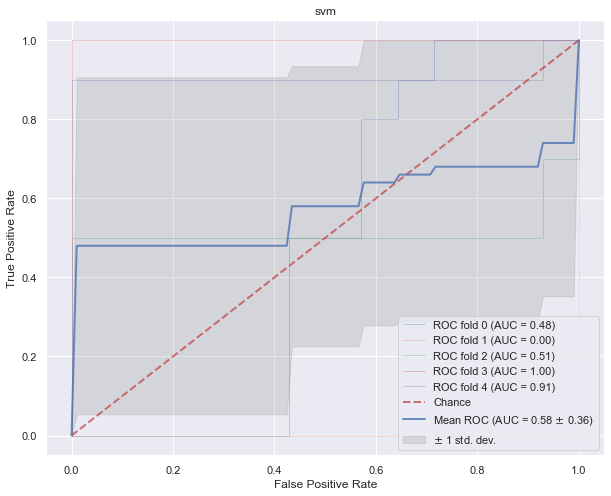

precesion: [0.89169001 0.90588235]
recall: [0.88571429 0.84      ]
f1: [0.86993088 0.84803922]
support: [14. 10.]


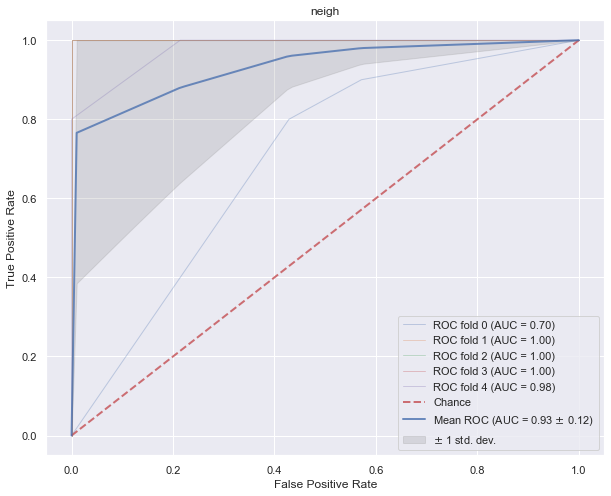

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precesion: [0.71125731 0.6       ]
recall: [1.   0.38]
f1: [0.82610048 0.46111111]
support: [14. 10.]


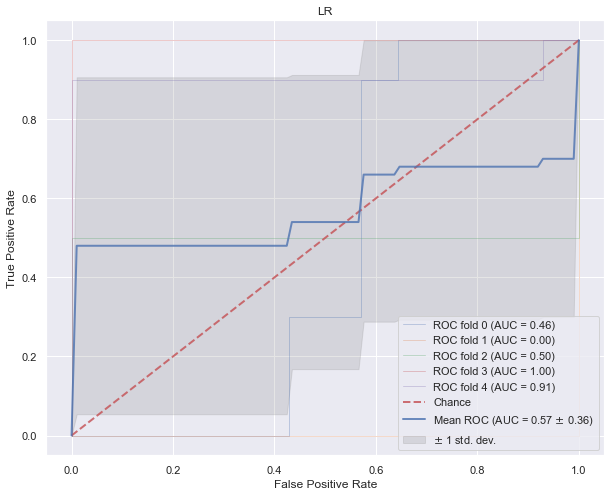

precesion: [0.8787535  0.88634921]
recall: [0.9  0.82]
f1: [0.88233646 0.84090471]
support: [14. 10.]


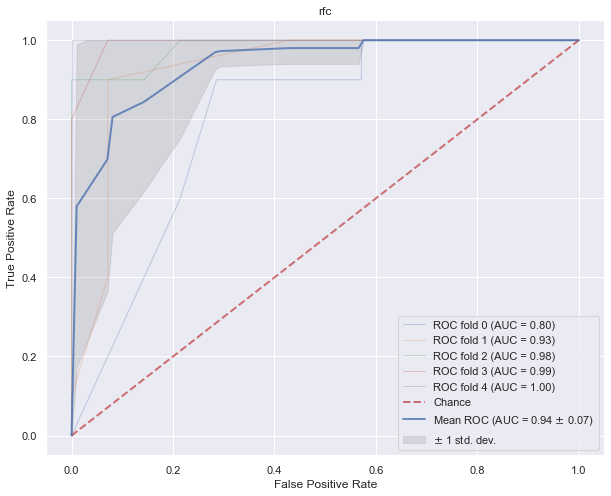

In [189]:
for idx, clf in enumerate(model):
    
    
    n_splits = 5
    cv = StratifiedKFold(n_splits = n_splits)
    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    avg_test_performence = [np.zeros((2)), np.zeros((2)), np.zeros((2)), np.zeros((2))]
    
    fig, ax = plt.subplots(sharey = True, tight_layout = False, figsize=(10, 8))
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        y_pred = classifier.predict(X[test])
        results = precision_recall_fscore_support(y[test], y_pred)
        for idj, r in enumerate(results):
            avg_test_performence[idj] += r
            
    avg_test_performence = [arr / n_splits for arr in avg_test_performence]
    print('precesion: {}\nrecall: {}\nf1: {}\nsupport: {}'.format(avg_test_performence[0],
                                                                  avg_test_performence[1],
                                                                  avg_test_performence[2],
                                                                  avg_test_performence[3]))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    ax.set_title(model_labels[idx])
    plt.show()